# Table of Contents

## 01. Library and Data Import
## 02. Data Cleaning
        Optimize Data Types
        Filter out trips starting in 2021
        Drop unnecessary columns
        Handle Missing Values
        Convert Float Columns to `float32`
        Removing invalid trip data
        Handle Duplicate Values
## 03. Temperature Line Chart
## 04. Aggregate trips and merge with main dataframe
## 05. Bike Trips & Temperatures Line Chart
## 06. Trip Duration Histogram
## 07. Dataset Export

### 01. Library and Data Import

In [1]:
# Import necessary libraries

# Pandas for data manipulation and analysis
import pandas as pd

# Matplotlib for data visualization
from matplotlib import pyplot as plt

# NumPy for numerical operations and array handling
import numpy as np

# Datetime module for handling date and time operations
from datetime import datetime as dt

In [2]:
# Import the Matplotlib library for data visualization
import matplotlib  

# Check and display the installed version of Matplotlib
matplotlib.__version__

'3.10.0'

In [3]:
# Define the file path for the 'newyork_data.csv' dataset
file_path = r"C:\Users\HP\Citi_Bike_Dashboard\02 Data\Prepared Data\newyork_data.csv"

# Load the dataset into a Pandas DataFrame
# - `index_col=0` sets the first column as the index
df = pd.read_csv(file_path, index_col=0)  

# Display the first few rows to confirm successful loading (optional)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_20152\2075897571.py:6: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, index_col=0)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
7012723,34BD74D84D320CF5,electric_bike,2021-01-30 17:30:45.544,2022-05-23 06:17:27.131,W 144 St & Adam Clayton Powell Blvd,7932.1,Frederick Douglass Blvd & W 112 St,7631.23,40.820877,-73.939249,40.801694,-73.957145,casual,2021-01-30,NaN,left_only
16758689,FA436228F4CD7647,classic_bike,2021-02-15 14:11:20.946,2022-08-10 15:01:30.839,Kent Ave & S 11 St,5062.01,Union Ave & Jackson St,5300.06,40.707645,-73.968415,40.716075,-73.952029,casual,2021-02-15,NaN,left_only
10829245,8FC77EAE2C0561E4,classic_bike,2021-03-11 22:08:54.461,2022-06-16 09:12:21.565,Union St & 4 Ave,4175.15,Flatbush Ave & Ocean Ave,3704.04,40.677274,-73.982820,40.663657,-73.963014,casual,2021-03-11,NaN,left_only
2167335,BF45D1E037463AA8,classic_bike,2021-03-14 18:17:59.923,2022-02-02 23:38:01.993,N 12 St & Bedford Ave,5450.04,S Portland Ave & Hanson Pl,4354.05,40.720798,-73.954847,40.685396,-73.974315,member,2021-03-14,NaN,left_only
21775695,763D82F8CFA1D9D1,classic_bike,2021-03-31 15:35:20.070,2022-09-25 14:33:21.607,Willoughby St & Fleet St,4628.05,DeKalb Ave & Franklin Ave,4528.01,40.691966,-73.981302,40.690648,-73.957462,casual,2021-03-31,NaN,left_only


### 02. Data Cleaning

In [4]:
# View basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29838806 entries, 7012723 to 29448623
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  date                object 
 14  avgTemp             float64
 15  _merge              object 
dtypes: float64(5), object(11)
memory usage: 3.8+ GB


In [6]:
df.shape

(29838806, 16)

#### Optimize Data Types

In [7]:
# Define optimized dtypes
dtype_optimization = {
    'ride_id': 'category',  # Unique identifier - best as a category
    'rideable_type': 'category',  # Limited set of bike types
    'start_station_name': 'category',  
    'start_station_id': 'category',  
    'end_station_name': 'category',  
    'end_station_id': 'category',  
    'member_casual': 'category'
}

In [8]:
# Convert categorical columns

df = df.astype(dtype_optimization)

In [9]:
# Convert datetime columns

df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [10]:
# Display memory usage after optimization

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 29838806 entries, 7012723 to 29448623
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             category      
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    category      
 6   end_station_name    category      
 7   end_station_id      category      
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
 13  date                datetime64[ns]
 14  avgTemp             float64       
 15  _merge              object        
dtypes: category(7), datetime64[ns](3), float64(5), object(1)
memory usage: 6.7 GB


#### Filter out trips starting in 2021

In [11]:
# Keep only trips that started in 2022
df = df[df['date'].dt.year == 2022]

# Reset index after filtering
df.reset_index(drop=True, inplace=True)

In [12]:
df.shape

(29838166, 16)

640 records were removed, which aligns with 640 'left_only' records from the dataframe merging in the previous task.

#### Drop unnecessary columns

In [13]:
# Removing the '_merge' column

df.drop(columns=['_merge'], inplace=True)

#### Handle Missing Values

In [14]:
# Check for missing values

df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name       49
start_station_id         49
end_station_name      69884
end_station_id        69884
start_lat                 0
start_lng                 0
end_lat               37223
end_lng               37223
member_casual             0
date                      0
avgTemp                   0
dtype: int64

In [15]:
# Drop rows with missing start station data
df = df.dropna(subset=['start_station_name', 'start_station_id'])

# Drop rows with missing end station data
df = df.dropna(subset=['end_station_name', 'end_station_id'])

# Drop rows with missing end coordinates
df = df.dropna(subset=['end_lat', 'end_lng'])

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Verify missing values are handled
print(df.isnull().sum())

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
date                  0
avgTemp               0
dtype: int64


In [18]:
df.shape

(29768282, 15)

**Missing Values removal explanation**

1. **Start Station Data**
    - These fields are critical for identifying where the trip started, therefore it is crucial to have this information.
    - Since the number is very small (~0.0002% of dataset) we can drop them and it won't significantly affect the analysis.
2. **End Station Data**
   - Missing end station data prevents proper trip mapping and analysis, therefore the missing fields should be removed.
   - Keeping them would skew results when analyzing the most common destinations
3. **End Coordinates Data**
   - Missing end coordinates makes geographic analysis unreliable.
   - Without coordinates, the destination cannot be mapped.
4. **Summary**
   - Only ~0.3% of the dataset is removed, thus preserving most records.

#### Convert Float Columns to `float32`

In [16]:
# Converting `float64` to `float32`
# This will reduce precision for float columns and saves memory

float_cols = df.select_dtypes(include=['float64']).columns
df[float_cols] = df[float_cols].astype('float32')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29768282 entries, 0 to 29768281
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             category      
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    category      
 6   end_station_name    category      
 7   end_station_id      category      
 8   start_lat           float32       
 9   start_lng           float32       
 10  end_lat             float32       
 11  end_lng             float32       
 12  member_casual       category      
 13  date                datetime64[ns]
 14  avgTemp             float32       
dtypes: category(7), datetime64[ns](3), float32(5)
memory usage: 2.8 GB


#### Removing invalid trip data

In [19]:
# Removing trips where the end data is BEFORE the start date
# This will remove trips that have negative duration, thus removing unusable trip data

df = df[df['ended_at'] > df['started_at']]

In [20]:
df.shape

(29767925, 15)

- There were 357 rows where a negative duration occurred.
- This was only ~0.001% of the dataset and removing them will not siginicantly affect the analysis.

#### Handle Duplicate Values

In [21]:
# Check for duplicates

df.duplicated().sum()

np.int64(0)

No duplicates in the dataset and no cleaning is required for this step.

### 03. Temperature Line Chart

In [6]:
# Set the 'date' column as the index to enable time-series analysis
df_temp = df.set_index('date')

# Display the first few rows to confirm changes
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-01,88237B34DAFDB069,electric_bike,2022-01-01 00:00:13.532,2022-01-01 00:30:28.482,Broadway & W 160 St,8157.06,Broadway & W 160 St,8157.06,40.835773,-73.943398,40.835773,-73.943398,casual,11.6
2022-01-01,4545E384F601A7E9,classic_bike,2022-01-01 00:00:32.146,2022-01-01 00:02:15.504,Forsyth St & Broome St,5453.05,Forsyth St & Broome St,5453.05,40.718941,-73.992661,40.718941,-73.992661,member,11.6
2022-01-01,7CE9B56332A37463,electric_bike,2022-01-01 00:00:42.801,2022-01-01 00:11:38.969,Myrtle Ave & Marcy Ave,4707.03,Willoughby St & Fleet St,4628.05,40.695396,-73.949547,40.691967,-73.981300,member,11.6
2022-01-01,AEAF2FFEBB00845B,electric_bike,2022-01-01 00:00:50.604,2022-01-01 02:39:37.688,W 15 St & 7 Ave,6030.06,W 33 St & 7 Ave,6407.07,40.739357,-73.999321,40.750198,-73.990929,casual,11.6
2022-01-01,9B01074C8CABA851,classic_bike,2022-01-01 00:01:05.031,2022-01-01 00:11:53.032,W 15 St & 7 Ave,6030.06,W 36 St & 7 Ave,6483.06,40.739357,-73.999321,40.752148,-73.989540,member,11.6


C:\Users\HP\anaconda3\envs\citi_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


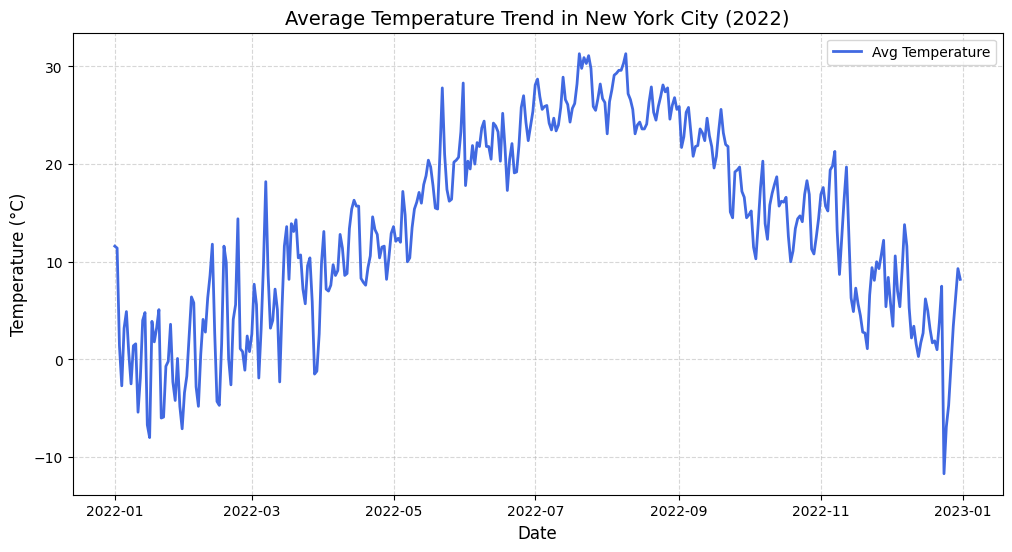

In [7]:
# Set figure size for better readability
plt.figure(figsize=(12, 6))  

# Add title to the plot
plt.title('Average Temperature Trend in New York City (2022)', fontsize=14)

# Plot the daily average temperature trend
plt.plot(df_temp['avgTemp'], color='royalblue', linewidth=2, label='Avg Temperature')

# Add x-axis label
plt.xlabel('Date', fontsize=12)

# Add y-axis label
plt.ylabel('Temperature (°C)', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend
plt.legend()

# Show the plot
plt.show()

**Code Explanation**
1. **Using a line plot**
- A line plot is best for tracking changes over time because it allows to observe trends.
- A line chart displats fluctuations better in comparison to bar charts.
2. **Setting a figure size**
- A wider aspect ratio of `(12,6)` prevents the timeline for not compressing, making fluctuations easier to observe.
3. **Custom labels, titles, & legend**
- These provide a clear description so the audience understands what the chart represents at a glance.
4. **Adding a Grid**
- A dashed grid helps track data points across the chart and helps compare different time periods (seasons).

### 04. Aggregate trips and merge with main dataframe

In [8]:
# View the column names

df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [9]:
# Group the DataFrame by the 'date' column and count the number of trips per day & convert grouped data into a new Dataframe

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

# Display the first few rows to verify the output
df_group.head()

,date,ride_id
0,2022-01-01,20198
1,2022-01-02,42203
2,2022-01-03,32453
3,2022-01-04,35869
4,2022-01-05,33689


In [10]:
# Rename the 'ride_id' column to 'bike_rides_daily' for better clarity
df_group.rename(columns={'ride_id': 'bike_rides_daily'}, inplace=True)

# Merge the grouped daily ride counts back into the main DataFrame on the 'date' column
# 'outer' join ensures all dates are retained, even if some have missing rides
df = df.merge(df_group, on="date", how='outer', indicator=True)

# Display the count of merge statuses to check for unmatched records
print(df['_merge'].value_counts(dropna=False))

# Validate the shape of the DataFrame for specific dates
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape)  # Check first day
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape)  # Check second day

# Set 'date' as the index for time-series analysis
df_temp = df.set_index('date')

# Print the column names of the updated DataFrame to verify changes
print(df_temp.columns)

_merge
both          29767925
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (20198, 17)
Shape of January 2nd is (42203, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


### 05. Bike Trips & Temperatures Line Chart

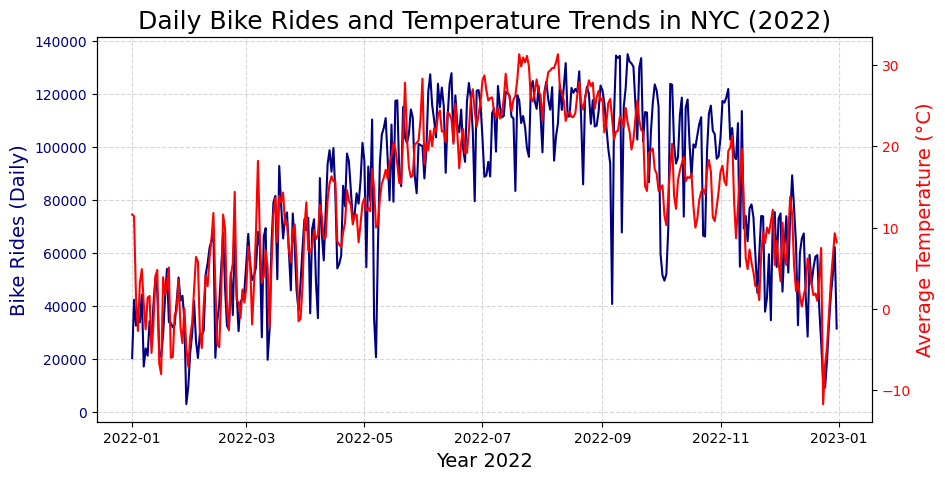

In [11]:
# Create a figure and primary axis object with specified figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the daily bike rides on the primary y-axis (left)
ax.plot(df_temp['bike_rides_daily'], color="navy", label="Bike Rides Daily")
ax.set_xlabel("Year 2022", fontsize=14)  # Set x-axis label
ax.set_ylabel("Bike Rides (Daily)", color="navy", fontsize=14)  # Set y-axis label with matching color
ax.tick_params(axis='y', labelcolor="navy")  # Ensure y-axis ticks match color
ax.grid(True, linestyle="--", alpha=0.5)  # Add a grid for better readability

# Create a secondary y-axis (right) to overlay temperature data
ax2 = ax.twinx()  # Initialize a twin axis object

# Plot the daily average temperature on the secondary y-axis
ax2.plot(df_temp["avgTemp"], color="red", label="Average Temperature")
ax2.set_ylabel("Average Temperature (°C)", color="red", fontsize=14)  # Set y-axis label with matching color
ax2.tick_params(axis='y', labelcolor="red")  # Ensure y-axis ticks match color

# Set title for the plot
plt.title("Daily Bike Rides and Temperature Trends in NYC (2022)", fontsize=18)

# Show the plot
plt.show()

##### 1. **Code Explanation**
- In the code above, **Matplotlib** was used to visualizse the relationship between **daily bike rides** and **temperature trends** in NYC for the year 2022.
- A **dual-axis line plot** was created to display two different datasets with distinct y-axes
---
##### 2. **How Matplotlib was used**
- The `subplots()` function initializes a **Figure** (fig) and an **Axes** (ax) object, which represents the primary plot area.
- A line plot of daily bike rides (`ax.plot()`) is drawn using the **primary y-axis** (`ax`).
- A **second y-axis** (`ax2`) is created using `twinx()`, allowing two different datasets (bike rides and temperature) to be plotted on the same figure.
- A **second line plot** (`ax2.plot()`) is drawn on the secondary y-axis for temperature trends.
- The x-axis is labeled as **"Year 2022"**, and the y-axes are labeled in corresponding colors (blue for bike rides; red for temperature) for better readability.
- The title (`plt.title()`) gives context to the visualization.
---
##### 3. **Matplotlib Paradigm Used**
- This code follows the **Object-Oriented (OO) Approach** of Matplotlib.
- The `fig, ax = plt.subplots()` approach is used, meaning `ax` and `ax2` are explicitly created as objects.

In [12]:
# Define the save path
save_path = r"C:\Users\HP\Citi_Bike_Dashboard\04 Analysis\Visualizations\bike_rides_temp_trend.png"

# Save the figure
fig.savefig(save_path, format='png', dpi=300, bbox_inches='tight')

# Confirm the file was saved
print(f"Figure saved successfully to: {save_path}")

Figure saved successfully to: C:\Users\HP\Citi_Bike_Dashboard\04 Analysis\Visualizations\bike_rides_temp_trend.png


In [14]:
# Define the file path for saving the pickle file
# pickle_path = r"C:\Users\HP\Citi_Bike_Dashboard\02 Data\Prepared Data\newyork_data_cleaned_v2.pkl"

# Save the DataFrame as a pickle file
# df_temp.to_pickle(pickle_path)

# print("Pickle file saved successfully!")

At this point in the script, I saved the most up-to-date dataframe. It has since been updated, but I kept this code for reference.

### 06. Trip Duration Histogram

In [5]:
# Ensure 'started_at' and 'ended_at' are in datetime format
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [6]:
# Calculate trip duration in minutes

df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60  # Convert from seconds to minutes

In [7]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,trip_duration
date,,,,,,,,,,,,,,,,
2022-01-01,88237B34DAFDB069,electric_bike,2022-01-01 00:00:13.532,2022-01-01 00:30:28.482,Broadway & W 160 St,8157.06,Broadway & W 160 St,8157.06,40.835773,-73.943398,40.835773,-73.943398,casual,11.6,20198,30.249167
2022-01-01,4545E384F601A7E9,classic_bike,2022-01-01 00:00:32.146,2022-01-01 00:02:15.504,Forsyth St & Broome St,5453.05,Forsyth St & Broome St,5453.05,40.718941,-73.992661,40.718941,-73.992661,member,11.6,20198,1.722633
2022-01-01,7CE9B56332A37463,electric_bike,2022-01-01 00:00:42.801,2022-01-01 00:11:38.969,Myrtle Ave & Marcy Ave,4707.03,Willoughby St & Fleet St,4628.05,40.695396,-73.949547,40.691967,-73.981300,member,11.6,20198,10.936133
2022-01-01,AEAF2FFEBB00845B,electric_bike,2022-01-01 00:00:50.604,2022-01-01 02:39:37.688,W 15 St & 7 Ave,6030.06,W 33 St & 7 Ave,6407.07,40.739357,-73.999321,40.750198,-73.990929,casual,11.6,20198,158.784733
2022-01-01,9B01074C8CABA851,classic_bike,2022-01-01 00:01:05.031,2022-01-01 00:11:53.032,W 15 St & 7 Ave,6030.06,W 36 St & 7 Ave,6483.06,40.739357,-73.999321,40.752148,-73.989540,member,11.6,20198,10.800017


In [8]:
# Get summary statistics

df['trip_duration'].describe()

count    2.976792e+07
mean     1.601799e+01
std      2.473200e+02
min      1.000233e+00
25%      5.788833e+00
50%      1.013913e+01
75%      1.792080e+01
max      4.044810e+05
Name: trip_duration, dtype: float64

**Summary Statistics**
- **Median:** 10.14 minutes
- **Mean:** 16 minutes
  - With the mean greater than the median, this suggests a **right-skewed distribution** meaning most users take short trips and a small number of long-duration trips are pulling the mean upwards.
- **Maximum trip** was ~281 days.
  - This record should be excluded from the analysis, assuming the bike was not properly returned.
- **Standard Deviation:** 247 minutes.
  - This means there is **high variation** in trip durations
  - Some users take very long trips, and others use the bikes briefly.
---
**Takeaway**
- Longer bike trips should be removed when creating a histogram.

In [9]:
# Import Seaborn Library

import seaborn as sns

print("Seaborn Version:", sns.__version__)

Seaborn Version: 0.13.2


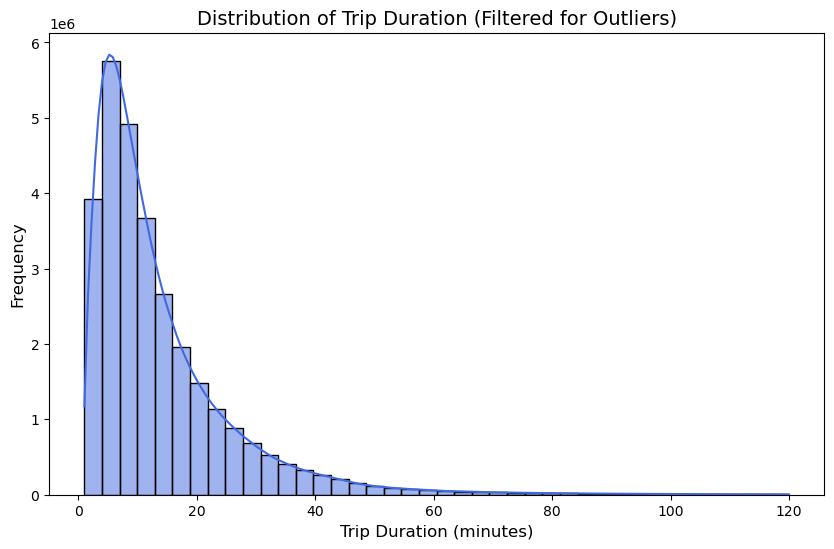

✅ Figure saved successfully to: C:\Users\HP\Citi_Bike_Dashboard\04 Analysis\Visualizations\trip_duration_histogram.png


In [10]:
import os

# Define the file path for saving the histogram
# Ensures that the visualization is stored for reporting or further analysis
save_path = r"C:\Users\HP\Citi_Bike_Dashboard\04 Analysis\Visualizations\trip_duration_histogram.png"

# Define an upper limit to filter out extreme outliers
# Trips longer than 2 hours (120 minutes) are considered unrealistic and excluded from the analysis
upper_limit = 120  

# Filter the dataset to include only valid trip durations
# This removes trips that exceed the defined upper limit
filtered_data = df[df['trip_duration'] <= upper_limit]['trip_duration']

# Set the figure size for improved visualization clarity
plt.figure(figsize=(10, 6))

# Create a histogram with a Kernel Density Estimate (KDE) curve
# - Bins: 40 (adjustable for better granularity)
# - KDE: Adds a smooth probability distribution curve for better trend visibility
# - Color: Uses 'royalblue' for a visually appealing output
sns.histplot(filtered_data, bins=40, kde=True, color='royalblue')

# Label axes and set the title
plt.xlabel("Trip Duration (minutes)", fontsize=12)  # X-axis label
plt.ylabel("Frequency", fontsize=12)  # Y-axis label
plt.title("Distribution of Trip Duration (Filtered for Outliers)", fontsize=14) # Title

# Save the figure before displaying it
# - Format: PNG (high-quality image format)
# - DPI: 300 (ensures a high-resolution image for presentations)
# - bbox_inches='tight' (removes unnecessary padding around the plot)
plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Confirm that the file was successfully saved
print(f"✅ Figure saved successfully to: {save_path}")

**Code Explanation**
1. **Filtering Outliers**
- The dataset includes unrealistic trip durations, and removing them will prevent distorted visuals.
2. **Histogram with KDE**
- KDE smooths out the histogram by helping interpret trend more clearly than a raw histogram alone.
3. **Custom labels, titles, & legend**
- These provide a clear description so the audience understands what the chart represents at a glance.

### 07. Dataset Export

In [11]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,trip_duration
date,,,,,,,,,,,,,,,,
2022-01-01,88237B34DAFDB069,electric_bike,2022-01-01 00:00:13.532,2022-01-01 00:30:28.482,Broadway & W 160 St,8157.06,Broadway & W 160 St,8157.06,40.835773,-73.943398,40.835773,-73.943398,casual,11.6,20198,30.249167
2022-01-01,4545E384F601A7E9,classic_bike,2022-01-01 00:00:32.146,2022-01-01 00:02:15.504,Forsyth St & Broome St,5453.05,Forsyth St & Broome St,5453.05,40.718941,-73.992661,40.718941,-73.992661,member,11.6,20198,1.722633
2022-01-01,7CE9B56332A37463,electric_bike,2022-01-01 00:00:42.801,2022-01-01 00:11:38.969,Myrtle Ave & Marcy Ave,4707.03,Willoughby St & Fleet St,4628.05,40.695396,-73.949547,40.691967,-73.981300,member,11.6,20198,10.936133
2022-01-01,AEAF2FFEBB00845B,electric_bike,2022-01-01 00:00:50.604,2022-01-01 02:39:37.688,W 15 St & 7 Ave,6030.06,W 33 St & 7 Ave,6407.07,40.739357,-73.999321,40.750198,-73.990929,casual,11.6,20198,158.784733
2022-01-01,9B01074C8CABA851,classic_bike,2022-01-01 00:01:05.031,2022-01-01 00:11:53.032,W 15 St & 7 Ave,6030.06,W 36 St & 7 Ave,6483.06,40.739357,-73.999321,40.752148,-73.989540,member,11.6,20198,10.800017


In [12]:
df.shape

(29767925, 16)

In [13]:
# Define the file path for saving the pickle file
pickle_path = r"C:\Users\HP\Citi_Bike_Dashboard\02 Data\Prepared Data\newyork_data_cleaned_v3.pkl"

# Save the DataFrame as a pickle file
df.to_pickle(pickle_path)

print("Pickle file saved successfully!")

Pickle file saved successfully!
